[IPython Notebook](hierarchical_triple_etvs.ipynb) |  [Python Script](hierarchical_triple_etvs.py)

LTTE ETVs in a Hierarchical Triple
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe2
from phoebe2 import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe2.utils.get_basic_logger(clevel='INFO')

b = phoebe2.Bundle.default_triple()
b['q@inner'] = 0.7
b['q@outer'] = 0.6
b['period@inner'] = 1
b['period@outer'] = 800
b['ecc@outer'] = 0.5
b['per0@outer'] = 60

/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Adding Datasets
--------------------

Let's first add an ORB dataset so that we can see what's going on with our orbit.  This is quite cheap, so we'll sample it so that we have 10 points for each orbit of the inner-binary but cover a full orbit of the outer-binary.

In [3]:
b.add_dataset('ORB', time=np.arange(0,800,0.1), dataset='orb01')

<ParameterSet: 4 parameters | components: _default, starA, starC, starB>

Let's sample the eclipse timings at every few orbits of the inner-binary for one full orbit of the outer-binary.

In [4]:
b.add_dataset('ETV', N=np.arange(0,800,4), dataset='etv01')

<ParameterSet: 25 parameters | contexts: dataset, constraint>

Running Compute
-------------------

In [5]:
b.add_compute(compute='mycompute')

<ParameterSet: 19 parameters | qualifiers: dynamics_method, eclipse_alg, gridsize, stepsize, lc_method, atm, enabled, ltte, rv_grav, orbiterror, rv_method, etv_method, maxpoints, delta, etv_tol, store_mesh, distortion_method, subdiv_num, mesh_method>

In [6]:
b.set_value_all('etv_method@etv01@mycompute', 'crossing')

In [7]:
b.set_value_all('etv_tol@etv01@mycompute', 30*u.s)

In [8]:
b.set_value('ltte@mycompute', True)

In [9]:
b.run_compute(compute='mycompute')

/home/kyle/.local/lib/python2.7/site-packages/phoebe2/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe2/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe2/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe2/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe2/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  t

<ParameterSet: 33 parameters | methods: ETV, ORB>

Plotting
------------

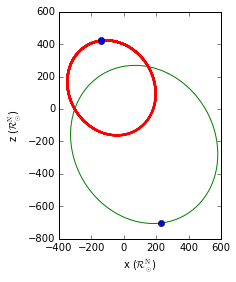

In [10]:
axs, artists = b['orb01@model'].plot(y='z', time=400)

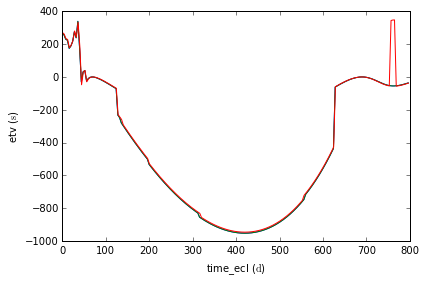

In [11]:
axs, artists = b['etv01@model'].plot(yunit=u.s)

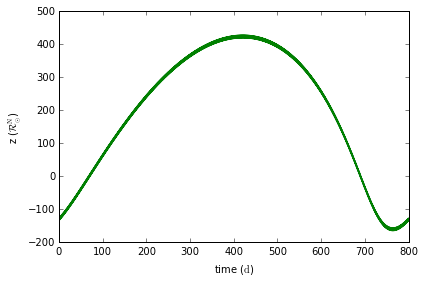

In [12]:
axs, artists = b['orb01@model'].plot(component=['starA', 'starB'], x='time', y='z')